In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataset.csv", index_col = 0)

In [ ]:
df.sample(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
12449,5GBFkZNbQ3wTxZCGX4dJeZ,Kelvin Kwan,Best Cantopop Tunes,你當我什麼,0.0,265826.0,False,0.592,0.3860,4.0,-8.913,1.0,0.0330,0.792000,0.000000,0.1090,0.272,124.999,4.0,cantopop
157,2lFlveK1y13WWp3vnQtrr3,Five For Fighting,The Battle for Everything,100 Years,66.0,244600.0,False,0.643,0.5690,7.0,-7.459,1.0,0.0276,0.544000,0.000022,0.1780,0.275,120.507,4.0,acoustic
3311,57BrRMwf9LrcmuOsyGilwr,Linkin Park,Hybrid Theory (Bonus Edition),Crawling,76.0,208960.0,False,0.580,0.7020,4.0,-5.565,1.0,0.0337,0.046600,0.000003,0.5360,0.299,105.076,4.0,alternative
18904,6hOozkc5SaHQjXc2dA853j,Micky Flanagan,Back In the Game,Doctors,21.0,501508.0,True,0.514,0.8410,8.0,-15.961,1.0,0.9030,0.823000,0.000000,0.9150,0.162,111.276,3.0,comedy
15128,56fkAaSu91c1E2k43wGPFC,MASN,How To Kill A Rockstar,Psycho!,68.0,197217.0,True,0.876,0.3120,7.0,-10.170,1.0,0.0521,0.443000,0.000000,0.2470,0.377,114.973,4.0,chill
4121,7gH3Oc5AaQs54XtEoLovox,Flower Face,The Shark in Your Water,Pisces Moon,51.0,219004.0,False,0.525,0.4110,1.0,-8.829,1.0,0.0261,0.671000,0.000338,0.0989,0.197,138.112,3.0,ambient
5835,7AInQo43ViMmcpWRfKcqsH,Kato,Anime & Chill 2,Pokémon Theme,45.0,99077.0,False,0.658,0.4890,7.0,-13.587,0.0,0.0302,0.403000,0.893000,0.1390,0.480,130.048,4.0,anime
18847,1rzsJZGhqKvGEbS5SnOZoc,Kathleen Madigan,Bothering Jesus,Sarah Mclachlan / Sad Animals,21.0,195210.0,False,0.522,0.8200,4.0,-6.788,1.0,0.4510,0.776000,0.000000,0.9550,0.484,87.523,4.0,comedy
3622,4BRlQ27PLKJtgnWGFISxOM,Bishop Briggs,Helloween Party,Dead Man's Arms,1.0,245173.0,False,0.535,0.5080,2.0,-5.996,0.0,0.0318,0.233000,0.000000,0.0993,0.236,134.577,4.0,alternative
9716,0TYKO6toBeKLbyD18AVTNU,Racionais MC's,"Nada Como um Dia Após o Outro Dia, Vol. 1 & 2",Na Fé Firmão,45.0,365133.0,False,0.873,0.7650,11.0,-5.254,1.0,0.4370,0.557000,0.000000,0.0592,0.948,90.014,4.0,brazil


In [ ]:
df.shape

(29616, 20)

Check for NA

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

track_id            0
artists             0
album_name          1
track_name          1
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64


In [ ]:
rows_with_missing = df.isnull().any(axis=1)
df[rows_with_missing]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
29615,5Gk8mWK6bJNuc6LjlF6UPd,Kaivon;Pauline Herr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove the only observation with missing value
df = df.drop(index=65900)

KeyError: '[65900] not found in axis'

In [ ]:
duplicates = df.duplicated()
print(duplicates.any())

True


In [ ]:
df.select_dtypes('number').describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,29615.000000,2.961500e+04,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000,29615.000000
mean,31.379301,2.363910e+05,0.571672,0.630911,5.312375,-8.755808,0.641432,0.099655,0.314390,0.217440,0.205891,0.459933,122.029227,3.905588
std,21.652332,1.326599e+05,0.177223,0.260764,3.561912,5.378331,0.479588,0.155317,0.344994,0.349089,0.186953,0.263515,29.235936,0.422649
min,0.000000,1.745300e+04,0.000000,0.000756,0.000000,-41.808000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,16.000000,1.748930e+05,0.457000,0.452000,2.000000,-10.692500,0.000000,0.036000,0.010500,0.000000,0.095100,0.236000,100.038500,4.000000
50%,29.000000,2.172580e+05,0.585000,0.677000,5.000000,-7.343000,1.000000,0.049100,0.146000,0.000371,0.126000,0.439000,122.091000,4.000000
75%,49.000000,2.719465e+05,0.704000,0.853000,8.000000,-5.225500,1.000000,0.085900,0.622000,0.389000,0.257000,0.672000,139.874500,4.000000
max,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.995000,0.995000,0.995000,243.372000,5.000000


In [ ]:
df.select_dtypes('number').corr().round(2)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.00,-0.10,-0.01,-0.07,-0.02,0.05,-0.01,-0.06,0.04,-0.15,-0.04,-0.08,-0.00,0.02
duration_ms,-0.10,1.00,-0.03,0.14,0.01,0.05,-0.05,-0.03,-0.18,0.13,0.01,-0.12,0.06,0.03
danceability,-0.01,-0.03,1.00,0.13,0.04,0.21,-0.06,0.06,-0.19,-0.17,-0.09,0.52,-0.07,0.17
energy,-0.07,0.14,0.13,1.00,0.05,0.78,-0.10,0.14,-0.74,-0.15,0.18,0.20,0.23,0.16
key,-0.02,0.01,0.04,0.05,1.00,0.04,-0.16,-0.00,-0.06,-0.01,0.00,0.04,0.01,0.01
loudness,0.05,0.05,0.21,0.78,0.04,1.00,-0.04,0.01,-0.63,-0.41,0.06,0.20,0.20,0.17
mode,-0.01,-0.05,-0.06,-0.10,-0.16,-0.04,1.00,-0.02,0.14,-0.07,0.02,0.02,-0.01,-0.03
speechiness,-0.06,-0.03,0.06,0.14,-0.00,0.01,-0.02,1.00,0.15,-0.14,0.46,0.02,-0.10,-0.10
acousticness,0.04,-0.18,-0.19,-0.74,-0.06,-0.63,0.14,0.15,1.00,0.07,0.04,-0.11,-0.23,-0.19
instrumentalness,-0.15,0.13,-0.17,-0.15,-0.01,-0.41,-0.07,-0.14,0.07,1.00,-0.12,-0.27,-0.00,-0.06


In [ ]:
df.to_csv('cleaned1.csv', index=False)

In [ ]:
df = df.drop(columns='Unnamed: 0')
df.head()

KeyError: "['Unnamed: 0'] not found in axis"

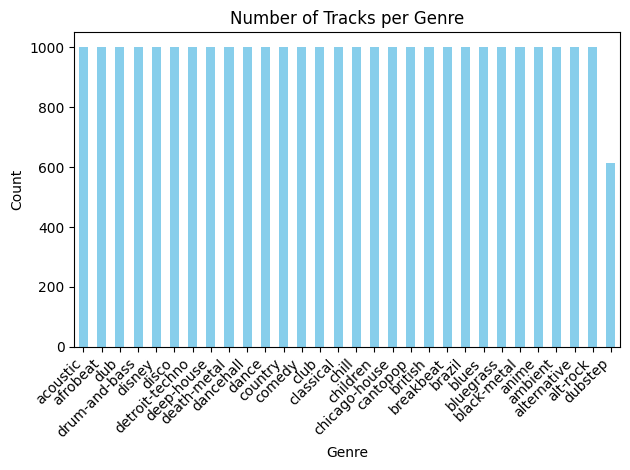

In [ ]:
genre_counts = df['track_genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

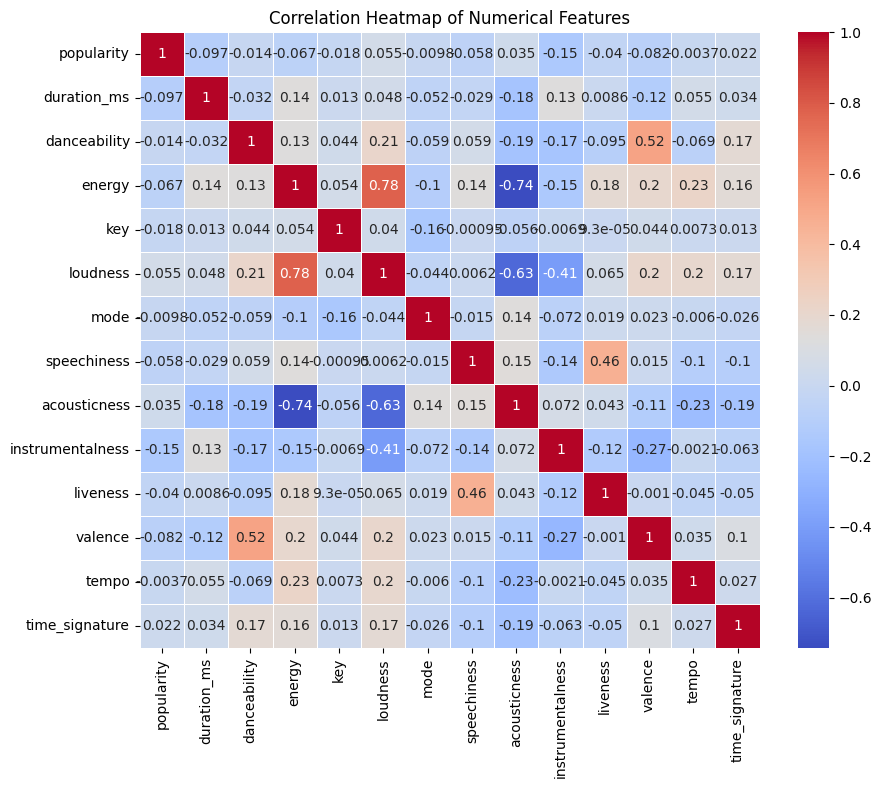

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

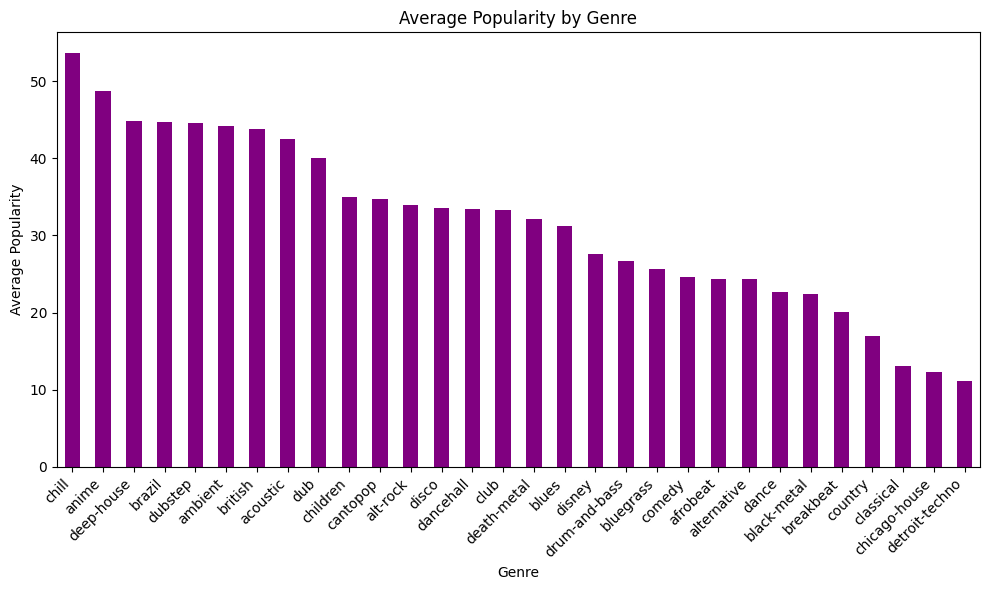

In [ ]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
avg_popularity_by_genre.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Average Popularity by Genre')
plt.ylabel('Average Popularity')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


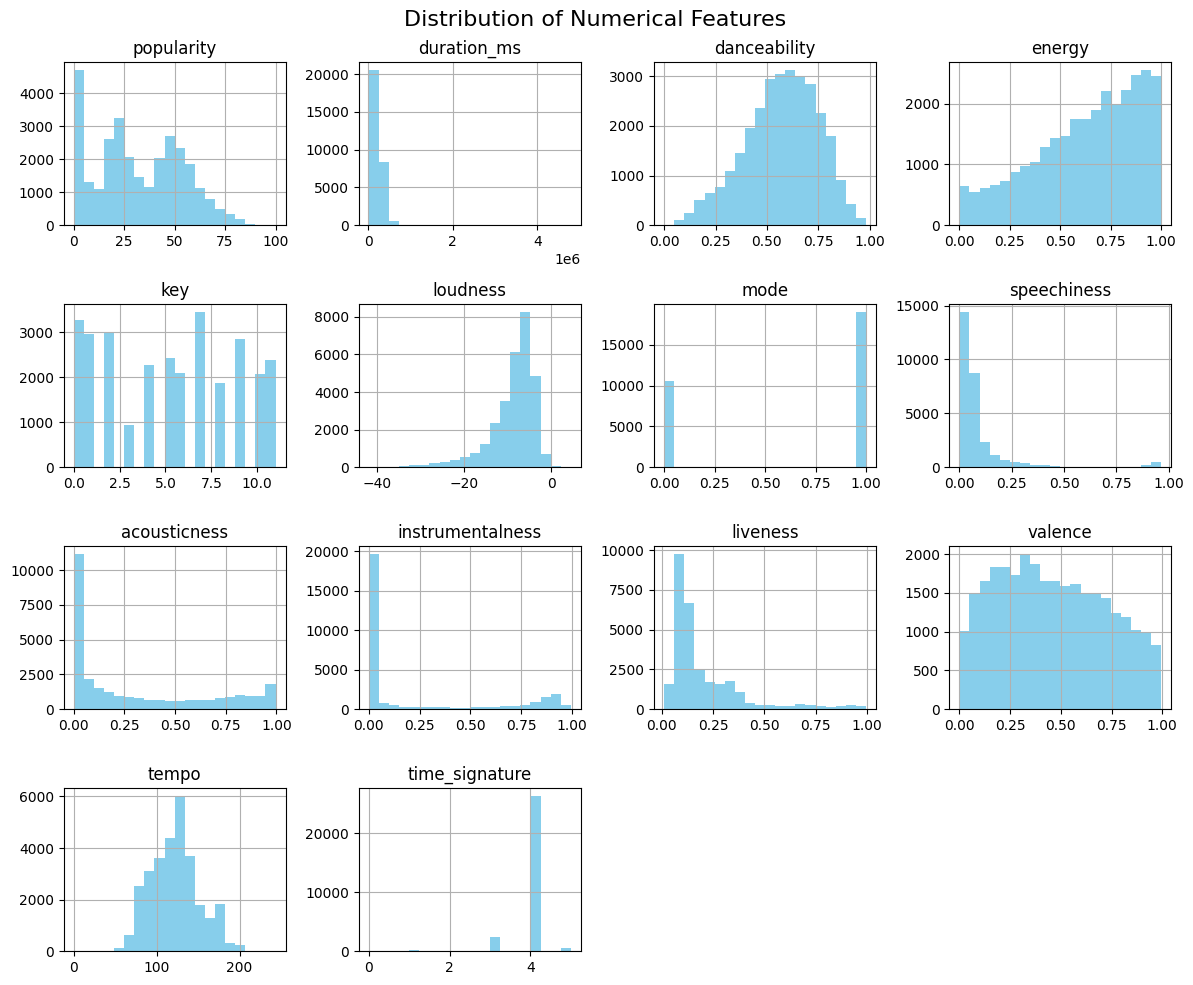

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns

df[numerical_cols].hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
